In [1]:
import os
import blosc

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

# from my_batch import MnistBatch
from dataset import DatasetIndex, Dataset

## Load data

In [16]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES=[]
src = '/notebooks/Koryagin/TfCourse/data/'

with open(os.path.join(src, 'mnist_pics.blk'), 'rb') as file:
    full_imgs = blosc.unpack_array(file.read())
    
with open(os.path.join(src, 'mnist_labels.blk'), 'rb') as file:
    full_labs = blosc.unpack_array(file.read())
    
src = (full_imgs, full_labs)

env: CUDA_VISIBLE_DEVICES=[]


In [17]:
LEN_MNIST = 65000
indy = DatasetIndex(np.arange(LEN_MNIST))

mnistset = Dataset(indy, batch_class=MnistBatch)
mnistset.cv_split([0.9, 0.1])

bch = MnistBatch(indy.create_subset(indy.indices[1:5]))

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
stats = []

## Train on the original data

In [19]:
# pipeline for train
ppl = (mnistset.train.pipeline().
       load(src=src, fmt='ndarray').
       train_convy(sess))

# pipeline for test
ppl_test = (mnistset.test.pipeline().
            load(src=src, fmt='ndarray').
            update_stats(sess, stats))

In [20]:
for i in tqdm(range(400)):
    ppl.next_batch(100, n_epochs=None)
    ppl_test.next_batch(100, n_epochs=None)

100%|██████████| 400/400 [00:21<00:00, 18.97it/s]


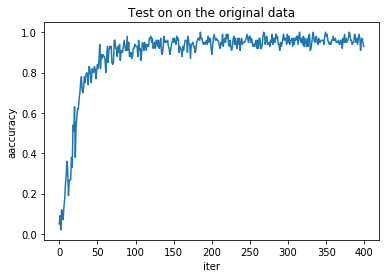

In [21]:
plt.title('Test on on the original data')
plt.plot(stats)
plt.xlabel('iter')
plt.ylabel('aaccuracy')
plt.show()

## Test on shifted data

In [22]:
ppl_test_shift = (mnistset.test.pipeline().
            load(src=src, fmt='ndarray').
            shift_flattened_pic().
            update_stats(sess, stats))

In [23]:
for i in tqdm(range(400)):
    ppl_test_shift.next_batch(100, n_epochs=None)

100%|██████████| 400/400 [00:16<00:00, 24.60it/s]


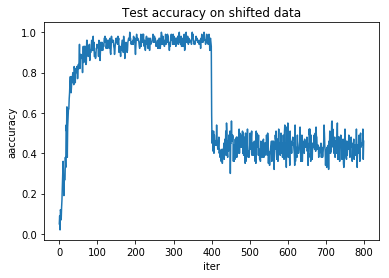

In [24]:
plt.title('Test accuracy on shifted data')
plt.plot(stats)
plt.xlabel('iter')
plt.ylabel('aaccuracy')
plt.show()

In [25]:
pics = []
y_true = []
y_predict = []
probs = []

ppl_results = (mnistset.test.pipeline().
    load(src=src, fmt='ndarray').
    shift_flattened_pic().
    predict(sess, pics, y_true, y_predict, probs))

In [26]:
ppl_results.next_batch(100, n_epochs=None)

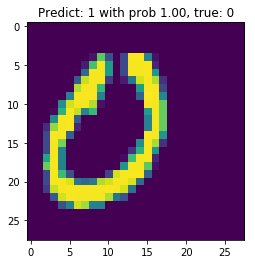

In [27]:
pos = np.where(np.array(y_predict[0]) != np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[4]], (28, 28)))
plt.title('Predict: %.0f with prob %.2f, true: %.0f' %(y_predict[0][pos[4]], np.amax(y_predict[0][pos[4]]), y_true[0][pos[4]]))
plt.show()

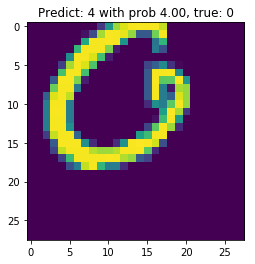

In [30]:
pos = np.where(np.array(y_predict[0]) != np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[10]], (28, 28)))
plt.title('Predict: %.0f with prob %.2f, true: %.0f' %(y_predict[0][pos[10]], np.amax(y_predict[0][pos[10]]), y_true[0][pos[10]]))
plt.show()

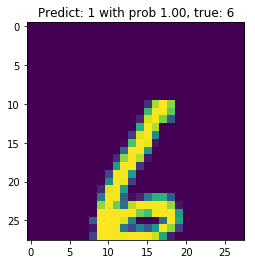

In [32]:
pos = np.where(np.array(y_predict[0]) != np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[12]], (28, 28)))
plt.title('Predict: %.0f with prob %.2f, true: %.0f' %(y_predict[0][pos[12]], np.amax(y_predict[0][pos[12]]), y_true[0][pos[12]]))
plt.show()

## Train on shifted data

In [33]:
# pipeline for train
ppl_shift = (mnistset.train.pipeline().
       load(src=src, fmt='ndarray').
       shift_flattened_pic().
       train_convy(sess))

In [34]:
for i in tqdm(range(400)):
    ppl_shift.next_batch(100, n_epochs=None)
    ppl_test_shift.next_batch(100, n_epochs=None)

100%|██████████| 400/400 [00:46<00:00,  8.80it/s]


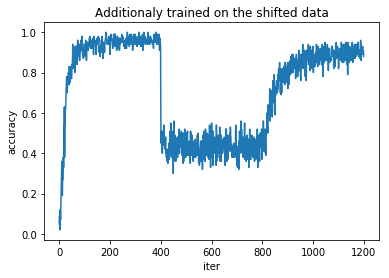

In [35]:
plt.title('Additionaly trained on the shifted data')
plt.plot(stats)
plt.xlabel('iter')
plt.ylabel('accuracy')
plt.show()

In [38]:
pics = []
y_true = []
y_predict = []
probs = []
ppl_results = (mnistset.test.pipeline().
    load(src=src, fmt='ndarray').
    shift_flattened_pic().
    predict(sess, pics, y_true, y_predict, probs))

In [39]:
ppl_results.next_batch(100, n_epochs=None)

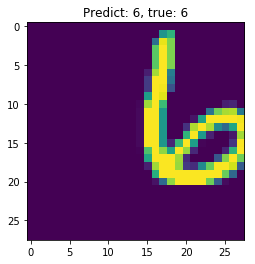

In [40]:
pos = np.where(np.array(y_predict[0]) == np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[4]], (28, 28)))
plt.title('Predict: %.0f, true: %.0f' %(y_predict[0][pos[4]], y_true[0][pos[4]]))

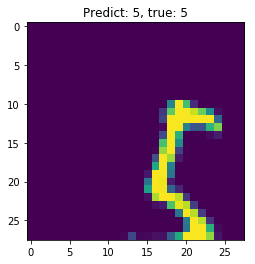

In [41]:
pos = np.where(np.array(y_predict[0]) == np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[10]], (28, 28)))
plt.title('Predict: %.0f, true: %.0f' %(y_predict[0][pos[10]], y_true[0][pos[10]]))

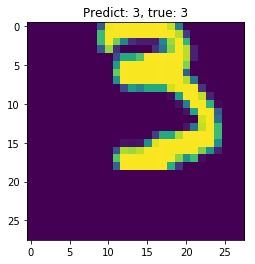

In [46]:
pos = np.where(np.array(y_predict[0]) == np.array(y_true[0]))[0]
plt.imshow(np.reshape(pics[0][pos[14]], (28, 28)))
plt.title('Predict: %.0f, true: %.0f' %(y_predict[0][pos[14]], y_true[0][pos[14]]))

In [43]:
type(range(5))

range